#使用预训练的卷积神经网络

## 挂载文件夹和数据集加载

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


将图像复制到训练、验证和测试的目录



In [0]:
import os, shutil

 > **注意：**已经复制过的，不要再执行这一段

In [0]:
original_dataset_dir = '/content/drive/My Drive/data/dogs-vs-cats/train'

base_dir = '/content/drive/My Drive/data/cats_and_dogs_small'
os.mkdir(base_dir)

train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir,'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir,'test')
os.mkdir(test_dir)

train_cats_dir = os.path.join(train_dir,'cats')
os.mkdir(train_cats_dir)
train_dogs_dir = os.path.join(train_dir,'dogs')
os.mkdir(train_dogs_dir)

validation_cats_dir = os.path.join(validation_dir,'cats')
os.mkdir(validation_cats_dir)
validation_dogs_dir = os.path.join(validation_dir,'dogs')
os.mkdir(validation_dogs_dir)

test_cats_dir = os.path.join(test_dir, 'cats')
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_cats_dir)
os.mkdir(test_dogs_dir)


fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
  src = os.path.join(original_dataset_dir,fname)
  dst = os.path.join(train_cats_dir, fname)
  shutil.copyfile(src,dst)
  
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
  src = os.path.join(original_dataset_dir,fname)
  dst = os.path.join(train_dogs_dir, fname)
  shutil.copyfile(src,dst)
  
  

fnames = ['cat.{}.jpg'.format(i) for i in range(1000,1500)]
for fname in fnames:
  src = os.path.join(original_dataset_dir,fname)
  dst = os.path.join(validation_cats_dir, fname)
  shutil.copyfile(src,dst)
  
fnames = ['dog.{}.jpg'.format(i) for i in range(1000,1500)]
for fname in fnames:
  src = os.path.join(original_dataset_dir,fname)
  dst = os.path.join(validation_dogs_dir, fname)
  shutil.copyfile(src,dst)
  

fnames = ['cat.{}.jpg'.format(i) for i in range(1500,2000)]
for fname in fnames:
  src = os.path.join(original_dataset_dir,fname)
  dst = os.path.join(test_cats_dir, fname)
  shutil.copyfile(src,dst)
  
fnames = ['dog.{}.jpg'.format(i) for i in range(1500,2000)]
for fname in fnames:
  src = os.path.join(original_dataset_dir,fname)
  dst = os.path.join(test_dogs_dir, fname)
  shutil.copyfile(src,dst)
  
  


In [12]:
len(os.listdir(train_cats_dir))

1000

> **注意：**复制过的请执行这一段

In [0]:
base_dir = '/content/drive/My Drive/data/cats_and_dogs_small'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

####5-3-1特征提取
　将VGG16 卷积基实例化

In [4]:
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                 include_top=False,
                 input_shape=(150,150,3))

Using TensorFlow backend.
W0802 12:10:43.979328 140639162226560 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0802 12:10:43.994634 140639162226560 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0802 12:10:44.003529 140639162226560 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0802 12:10:44.050885 140639162226560 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



58892288/58889256 [==============================] - 3s 0us/step


W0802 12:10:47.641603 140639162226560 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0802 12:10:47.643102 140639162226560 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:181: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigProto instead.



查看下载到的模型

In [5]:
!ls ~/.keras/models

vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5


这里向构造函数中传入了三个参数。
- weights指定模型初始化的权重检查点。
- include_top 指定模型最后是否包含密集连接分类器。默认情况下，这个密集连接分
类器对应于ImageNet 的1000 个类别。因为我们打算使用自己的密集连接分类器（只有
两个类别：cat 和dog），所以不需要包含它。
- input_shape 是输入到网络中的图像张量的形状。这个参数完全是可选的，如果不传
入这个参数，那么网络能够处理任意形状的输入。

VGG16 卷积基的详细架构如下所示。它和你已经熟悉的简单卷积神经网络很相似。

In [6]:
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

最后的特征图形状为(4, 4, 512)。我们将在这个特征上添加一个密集连接分类器。
接下来，下一步有两种方法可供选择。
- 在你的数据集上运行卷积基，将输出保存成硬盘中的Numpy 数组，然后用这个数据作
为输入，输入到独立的密集连接分类器中（与本书第一部分介绍的分类器类似）。这种
方法速度快，计算代价低，因为对于每个输入图像只需运行一次卷积基，而卷积基是目
前流程中计算代价最高的。但出于同样的原因，这种方法不允许你使用数据增强。
-在顶部添加 Dense 层来扩展已有模型（即 conv_base），并在输入数据上端到端地运行
整个模型。这样你可以使用数据增强，因为每个输入图像进入模型时都会经过卷积基。
但出于同样的原因，这种方法的计算代价比第一种要高很多。

这两种方法我们都会介绍。首先来看第一种方法的代码：保存你的数据在conv_base 中的输出，然后将这些输出作为输入用于新模型。
1.  不使用数据增强的快速特征提取

首先，运行ImageDataGenerator 实例，将图像及其标签提取为Numpy 数组。我们需要
调用conv_base 模型的predict 方法来从这些图像中提取特征。

>使用预训练的卷积基提取特征

In [0]:
import numpy as np
from keras.preprocessing.image import ImageDataGenerator


In [8]:
datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

def extract_features(directory, sample_count):
  features = np.zeros(shape=(sample_count, 4, 4, 512))
  labels = np.zeros(shape=(sample_count))
  generator = datagen.flow_from_directory(directory,
                                         target_size=(150,150),
                                         batch_size=batch_size,
                                         class_mode='binary')
  i = 0
  for inputs_batch, labels_batch in generator:
    features_batch = conv_base.predict(inputs_batch)
    features[i* batch_size : (i+1)* batch_size] = features_batch
    labels[i* batch_size : (i+1) * batch_size] = labels_batch
    i +=1
    if i * batch_size >= sample_count:
      break #注意，这些生成器在循环中不断生成数据，所以你必须在读取完所有图像后终止循环
  return features,labels
  
train_features, train_labels = extract_features(train_dir,2000)
validation_features, validation_labels = extract_features(validation_dir,1000)
test_features, test_labels = extract_features(test_dir,1000)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


目前，提取的特征形状为(samples, 4, 4, 512)。我们要将其输入到密集连接分类器中，
所以首先必须将其形状展平为(samples, 8192)。

In [0]:
train_features = np.reshape(train_features,(2000, 4* 4* 512))
validation_features = np.reshape(validation_features,(1000, 4* 4* 512))
test_features = np.reshape(test_features,(1000, 4* 4* 512))


In [10]:
train_features.shape,validation_features.shape,test_features.shape

((2000, 8192), (1000, 8192), (1000, 8192))

现在你可以定义你的密集连接分类器（注意要使用dropout 正则化），并在刚刚保存的数据和标签上训练这个分类器。

In [0]:
from keras import models
from keras import layers
from keras import optimizers

In [12]:
model = models.Sequential()
model.add(layers.Dense(256,activation='relu',input_dim= 4* 4* 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
             loss='binary_crossentropy',
             metrics=['acc'])

history = model.fit(train_features,train_labels,
                   epochs=30,
                   batch_size=20,
                   validation_data=(validation_features,validation_labels))

W0802 12:29:00.533459 140639162226560 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
W0802 12:29:00.684277 140639162226560 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0802 12:29:00.702252 140639162226560 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 2000 samples, validate on 1000 samples
Epoch 1/30
2000/2000 [==============================] - 2s 925us/step - loss: 0.6060 - acc: 0.6730 - val_loss: 0.4428 - val_acc: 0.8370
Epoch 2/30
2000/2000 [==============================] - 1s 397us/step - loss: 0.4478 - acc: 0.7870 - val_loss: 0.3670 - val_acc: 0.8610
Epoch 3/30
2000/2000 [==============================] - 1s 409us/step - loss: 0.3559 - acc: 0.8550 - val_loss: 0.3249 - val_acc: 0.8760
Epoch 4/30
2000/2000 [==============================] - 1s 416us/step - loss: 0.3169 - acc: 0.8735 - val_loss: 0.2994 - val_acc: 0.8910
Epoch 5/30
2000/2000 [==============================] - 1s 410us/step - loss: 0.2787 - acc: 0.8895 - val_loss: 0.2923 - val_acc: 0.8810
Epoch 6/30
2000/2000 [==============================] - 1s 413us/step - loss: 0.2653 - acc: 0.8945 - val_loss: 0.2780 - val_acc: 0.8880
Epoch 7/30
2000/2000 [==============================] - 1s 400us/step - loss: 0.2418 - acc: 0.9110 - val_loss: 0.2634 - val_acc: 0.8980


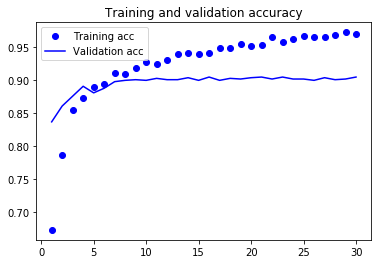

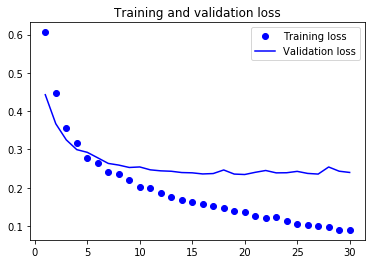

In [13]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

#### 2. 使用数据增强的特征提取

>注意 本方法计算代价很高，只在有GPU 的情况下才能尝试运行。它在CPU 上是绝对难以运
行的。如果你无法在GPU 上运行代码，那么就采用第一种方法。

In [0]:
model2 = models.Sequential()
model2.add(conv_base)
model2.add(layers.Flatten())
model2.add(layers.Dense(256, activation='relu'))
model2.add(layers.Dense(1, activation='sigmoid'))

In [15]:
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


如你所见，VGG16 的卷积基有14 714 688 个参数，非常多。在其上添加的分类器有200 万个参数。

在编译和训练模型之前，一定要“冻结”卷积基。冻结（freeze）一个或多个层是指在训练过程中保持其权重不变。如果不这么做，那么卷积基之前学到的表示将会在训练过程中被修改。因为其上添加的Dense 层是随机初始化的，所以非常大的权重更新将会在网络中传播，对之前学到的表示造成很大破坏。

在Keras 中，冻结网络的方法是将其trainable 属性设为False。

In [17]:
print('This is the number of trainable weights before freezing the conv base:', len(model2.trainable_weights))

This is the number of trainable weights before freezing the conv base: 30


In [0]:
conv_base.trainable = False

In [19]:
print('This is the number of trainable weights after freezing the conv base:', len(model2.trainable_weights))

This is the number of trainable weights after freezing the conv base: 4


如此设置之后，只有添加的两个Dense 层的权重才会被训练。总共有4 个权重张量，每层
2 个（主权重矩阵和偏置向量）。注意，为了让这些修改生效，你必须先编译模型。如果在编译
之后修改了权重的trainable 属性，那么应该重新编译模型，否则这些修改将被忽略。

现在你可以开始训练模型了，使用和前一个例子相同的数据增强设置。

In [20]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150),
                                                    batch_size=20,class_mode='binary')
validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=(150, 150),
                                                        batch_size=20,class_mode='binary')
model2.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])
history = model2.fit_generator(train_generator,
                               steps_per_epoch=100,
                               epochs=30,
                               validation_data=validation_generator,
                               validation_steps=50)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/30
100/100 [==============================] - 31s 306ms/step - loss: 0.5837 - acc: 0.7030 - val_loss: 0.4814 - val_acc: 0.7660
Epoch 2/30
100/100 [==============================] - 28s 285ms/step - loss: 0.4816 - acc: 0.7810 - val_loss: 0.3841 - val_acc: 0.8460
Epoch 3/30
100/100 [==============================] - 28s 282ms/step - loss: 0.4343 - acc: 0.8055 - val_loss: 0.3389 - val_acc: 0.8690
Epoch 4/30
100/100 [==============================] - 28s 281ms/step - loss: 0.4045 - acc: 0.8130 - val_loss: 0.3117 - val_acc: 0.8740
Epoch 5/30
100/100 [==============================] - 28s 277ms/step - loss: 0.3848 - acc: 0.8385 - val_loss: 0.3065 - val_acc: 0.8730
Epoch 6/30
100/100 [==============================] - 28s 279ms/step - loss: 0.3618 - acc: 0.8480 - val_loss: 0.2855 - val_acc: 0.8830
Epoch 7/30
100/100 [==============================] - 28s 283ms/step - loss: 0.3701 - acc: 0.8270 - val_lo

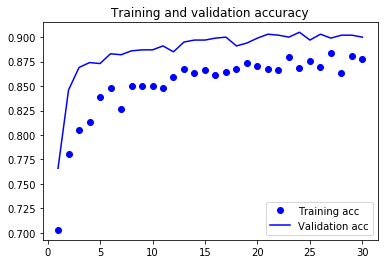

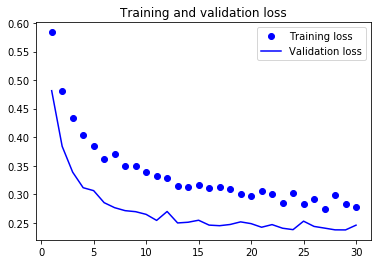

In [22]:

import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

# 5.3.2　微调模型